In [1]:
import os
import sys
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

sys.path.append(os.path.expanduser("~"))
sys.path.append(os.path.dirname(os.getcwd()))
from functions import FeatureEngine

In [2]:
def CLtrajectory_plotter(CLine, XY, y, cluster_color, cluster_label, figsize=(10,10), fn=''):
    fig, ax = plt.subplots(figsize=(10,10))
    legend_elements = [Line2D([0], [0],color=cluster_color[i], label=cluster_label [i]) for i in cluster_label]
    adjustCL = (CLine-np.nanmean(CLine))+np.repeat(XY.reshape(XY.shape[0],1,XY.shape[1]), CLine.shape[1], axis=1)-np.nanmean(XY, axis=0)# fits better than subtracting 50
    adjustXY = XY-np.nanmean(XY, axis=0)
    for l in np.unique(y).astype(int):
        il = np.where(y == l)[0]
        ax.plot(*adjustCL[il].T, c=cluster_color[l], alpha = 0.1)
            
    ax.set_title(fn)
    ax.axis('equal')
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1,1))
    return fig

In [3]:
inpath = '/gpfs/soma_fs/home/boeger/PpaPred_builder/data/example'
inpath_y = "/gpfs/soma_fs/home/boeger/PpaPred_builder/ML/XGBBestModel_35727184_20240515"
outpath = '/gpfs/soma_fs/home/boeger/PpaPred_builder/data/example/temp'

config = yaml.safe_load(open(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred_builder/',"config.yml"), "r"))
cluster_label = config['cluster_group_man']
cluster_color = config['cluster_color']

XYs, CLines  = FeatureEngine.run(inpath, outpath, return_XYCLine =True, skip_engine = True)

  0%|          | 0/1 [00:00<?, ?it/s]

feature calculation for GGE0284_c_results_22.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 11703)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 4987,  7946,  8102,  8104,  8105,  8106,  8107,  8108,  8109,
        8110,  8114, 11264]),)
split 1, range: (11715, 13190)
split 2, range: (13191, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  6,  11,  13,  16,  17,  19,  20,  21,  22, 389, 397, 399, 400,
       403, 404, 407, 409, 410, 411, 414, 415, 418]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/algebra.py:27: RuntimeWarning: invalid value encountered in divide
  unit_vec = np.divide(base,vlen)
/gpfs/soma_fs/home/boeger/PpaPred/functions/algebra.py:27: RuntimeWarning: invalid value encountered in divide
  unit_vec = np.divide(base,vlen)
100%|██████████| 1/1 [00:03<00:00,  3.73s/it]

In [4]:
ys = {}
for fn in XYs:
    fn_base = '_'.join(fn.split('_')[:4]).split('.')[0]
    cluster_file = [f for f in os.listdir(inpath_y) if fn_base in f and f.endswith('json')][0]
    y = pd.read_json(os.path.join(inpath_y, cluster_file), orient='split')['prediction']
    ys[fn] = y
ys

{'GGE0284_c_results_22.json_labeldata.csv': 0       -1
 1       -1
 2       -1
 3       -1
 4       -1
         ..
 17994   -1
 17995   -1
 17996   -1
 17997   -1
 17998   -1
 Name: prediction, Length: 17999, dtype: int64}

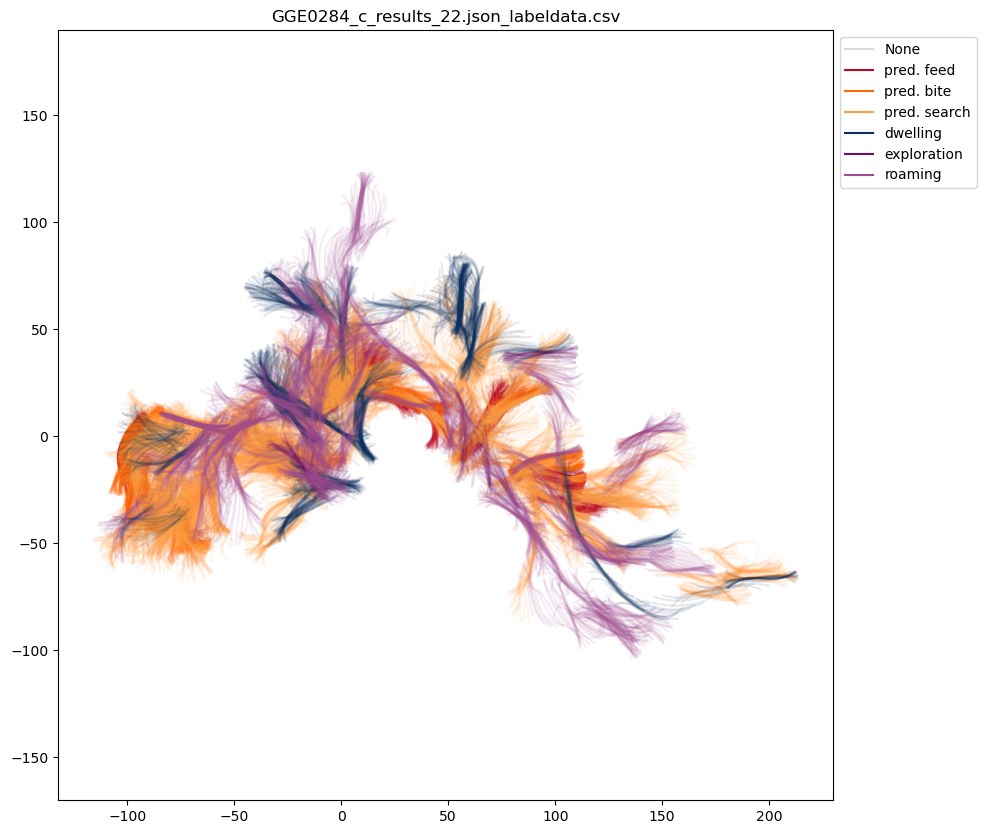

In [6]:
for fn in XYs:
    CLtrajectory_plotter(CLines[fn],XYs[fn], ys[fn], cluster_color, cluster_label, fn=fn)